In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

### Visualizing Time Series 

Graphs can help visualize different aspects of time series

  * Including patterns (trend and seasonality) 
  * Outliers observations
  * Changes over time
  * etc.

### Seasonality Trend


<img src="images/types_plot.png" alt="drawing" style="width:900px;"/>

* Forecasting, Principles and Practice (Hyndman & Athanasopoulos)





In [18]:
diabetes= pd.read_csv("data/a10.csv",  usecols=['value'])
print(diabetes.shape)
diabetes.head()

(204, 1)


,value
0,3.526591
1,3.180891
2,3.252221
3,3.611003
4,3.565869


In [19]:
date_range = pd.date_range(start ="1991-07", end="2008-06", freq="MS")
len(date_range)
date_range

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', length=204, freq='MS')

In [20]:
diabetes.index = date_range
diabetes.head()

,value
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


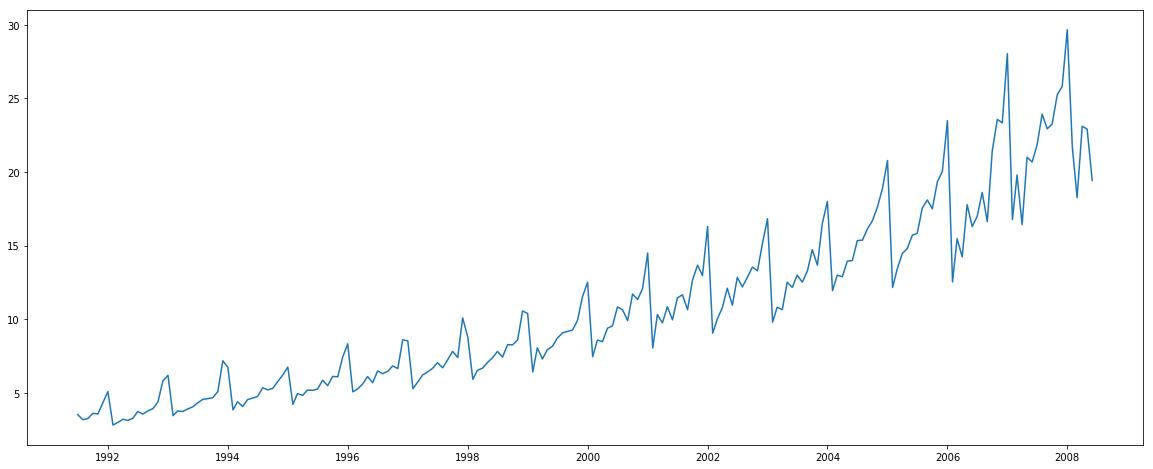

In [21]:
plt.figure(figsize=(20,8))
plt.plot(diabetes)

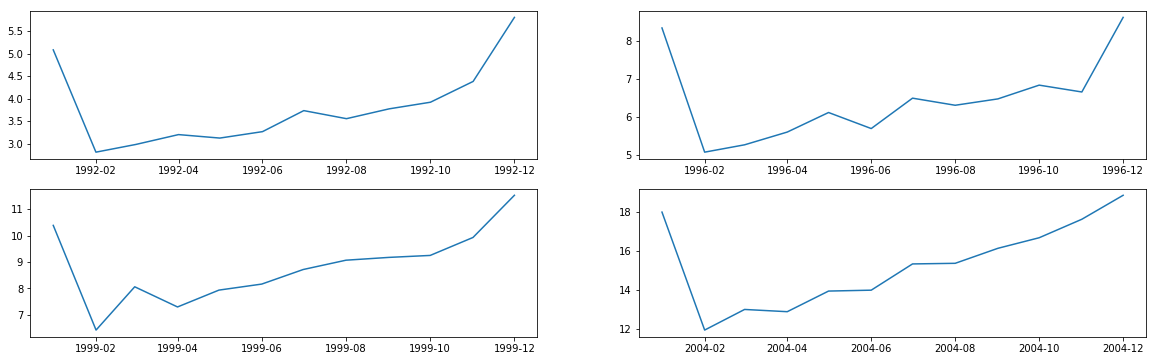

In [22]:
plt.figure(figsize=(20,6))

plt.subplot(2,2,1)
plt.plot(diabetes["1992"])
plt.subplot(2,2,2)
plt.plot(diabetes["1996"])
plt.subplot(2,2,3)
plt.plot(diabetes["1999"])
plt.subplot(2,2,4)
plt.plot(diabetes["2004"])

In [23]:
years = sorted(set(diabetes.index.year))
years

[1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008]

In [24]:
diabetes["2001"].reset_index()


,index,value
0,2001-01-01,14.497581
1,2001-02-01,8.049275
2,2001-03-01,10.312891
3,2001-04-01,9.753358
4,2001-05-01,10.850382
5,2001-06-01,9.961719
6,2001-07-01,11.443601
7,2001-08-01,11.659239
8,2001-09-01,10.647060
9,2001-10-01,12.652134


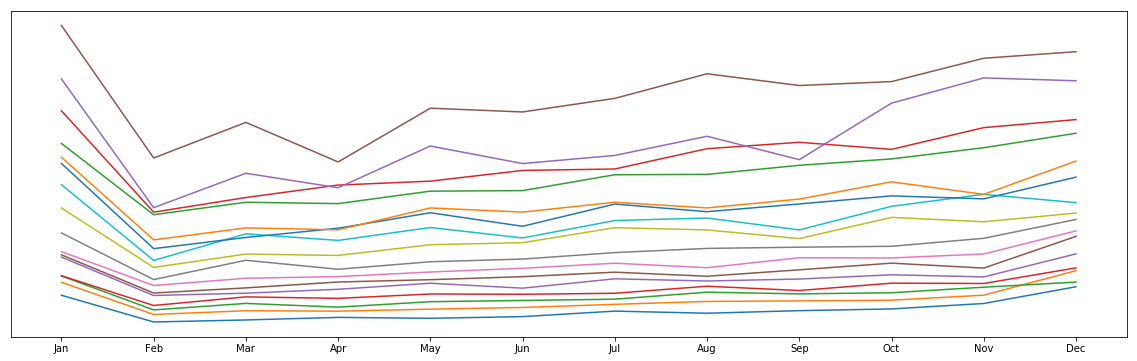

In [27]:
plt.figure(figsize=(20,6))
orderedMonths = ["Jan", "Feb", "Mar", 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    
for year in years[1:-1]:
    plt.plot(diabetes[str(year)].reset_index()["value"])

plt.yticks([],[])
_ = plt.xticks(range(12), orderedMonths)

In [30]:
diabetes['month'] = diabetes.index.strftime('%b')
diabetes['year'] = diabetes.index.year
diabetes.head()

,value,month,year
1991-07-01,3.526591,Jul,1991
1991-08-01,3.180891,Aug,1991
1991-09-01,3.252221,Sep,1991
1991-10-01,3.611003,Oct,1991
1991-11-01,3.565869,Nov,1991


In [31]:
diabetes_piv = diabetes.pivot(index='year', columns='month', values='value')
diabetes_piv.head()


month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1991,NaN,3.180891,4.306371,NaN,NaN,3.526591,NaN,NaN,NaN,3.565869,3.611003,3.252221
1992,3.204780,3.558776,5.810549,2.814520,5.088335,3.737851,3.270523,2.985811,3.127578,4.386531,3.924490,3.777202
1993,3.734303,4.562185,7.179962,3.450857,6.192068,4.315566,4.049687,3.772307,3.905399,5.093841,4.667851,4.608662
1994,4.075341,5.350605,6.204593,3.841278,6.731473,4.752607,4.645615,4.394076,4.540645,5.773742,5.301651,5.204455
1995,4.823045,5.855277,7.416598,4.216067,6.749484,5.256742,5.170787,4.949349,5.194754,6.088473,6.115293,5.490729


In [32]:
orderedMonths = ["Jan", "Feb", "Mar", 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
diabetes_piv = diabetes_piv.reindex(columns=orderedMonths)
diabetes_piv.head()


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1991,NaN,NaN,NaN,NaN,NaN,NaN,3.526591,3.180891,3.252221,3.611003,3.565869,4.306371
1992,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490,4.386531,5.810549
1993,6.192068,3.450857,3.772307,3.734303,3.905399,4.049687,4.315566,4.562185,4.608662,4.667851,5.093841,7.179962
1994,6.731473,3.841278,4.394076,4.075341,4.540645,4.645615,4.752607,5.350605,5.204455,5.301651,5.773742,6.204593
1995,6.749484,4.216067,4.949349,4.823045,5.194754,5.170787,5.256742,5.855277,5.490729,6.115293,6.088473,7.416598


### Polar Plots

* Polar plot is the plot of data expressed in polar coordinates, with radius $r$ as the reponse $y$ as a function of angle $\theta$

  * I.e., the radius $r$ is the distance from the central point and $\theta$ is the angle from the `x-axis`

In [1]:
diabetes[str(2001)].index.month

NameError: name 'diabetes' is not defined

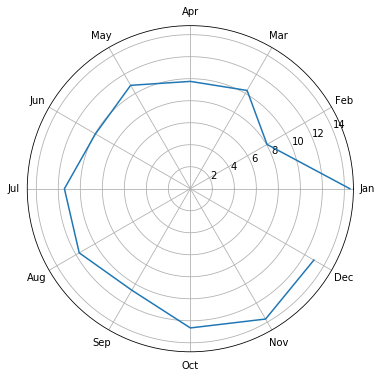

In [36]:
plt.figure(figsize=(12, 6))


ax = plt.subplot(1, 1, 1, projection='polar')

months = np.linspace(0, 2*np.pi, 12, endpoint=False)
ax.set_thetagrids(months * 180/np.pi, orderedMonths)
plt.plot(months, diabetes[str(2001)]["value"])


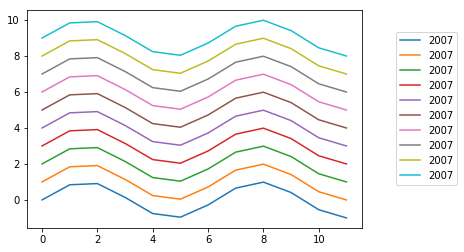

In [37]:
ref = np.arange(12)

for i in range(10):

    y = np.sin(ref) + i
    plt.plot(ref, y, label=str(year))    
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.55))



(<a list of 26 Line2D ticklines objects>,
 <a list of 13 Text major ticklabel objects>)

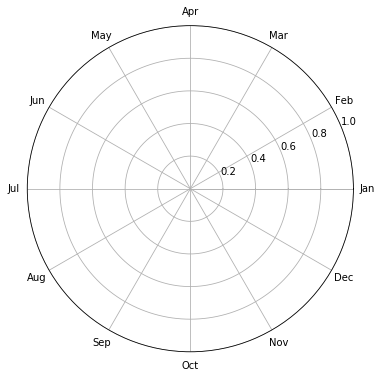

In [38]:
plt.figure(figsize=(40, 6))


ax = plt.subplot(1, 1, 1, projection='polar')

angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

angles =  np.concatenate([angles, [angles[0]]])

ax.set_thetagrids(angles * 180/np.pi, orderedMonths)



(<a list of 26 Line2D ticklines objects>,
 <a list of 13 Text major ticklabel objects>)

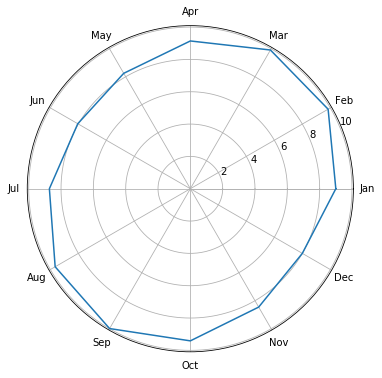

In [53]:
plt.figure(figsize=(40, 6))
ax = plt.subplot(1, 1, 1, projection='polar')

plt.plot(angles, np.concatenate([y,[y[0]]]), label=str(year))
ax.set_thetagrids(angles * 180/np.pi, orderedMonths)


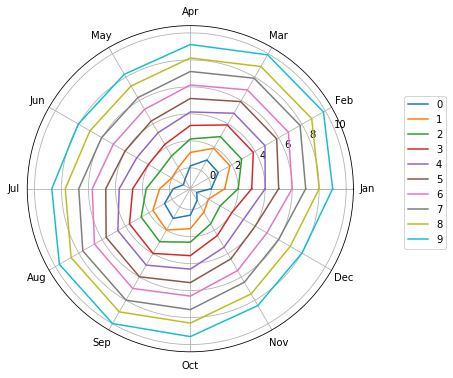

In [52]:
plt.figure(figsize=(40, 6))
ref = np.arange(12)

ax = plt.subplot(1, 1, 1, projection='polar')
ax.set_thetagrids(angles * 180/np.pi, orderedMonths)

    
for i in range(10):
    y = np.sin(ref) + i
    # We add the value of January again at the end 
    # so that the series begins and ends in January, instead of
    # December
    vals = np.concatenate([y, [y[0]]])

    plt.plot(angles, vals, label=str(i))
    
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.55))



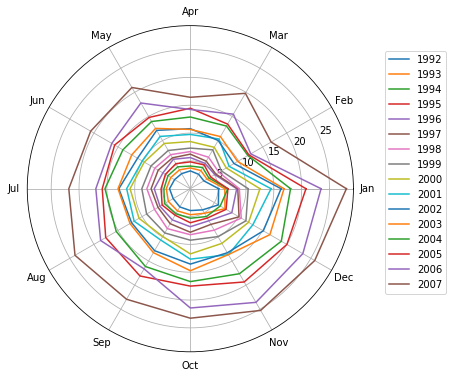

In [543]:
plt.figure(figsize=(40, 6))


ax = plt.subplot(1, 1, 1, projection='polar')

angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

angles =  np.concatenate([angles, [angles[0]]])

ax.set_thetagrids(angles * 180/np.pi, orderedMonths)

    
for year in years[1:-1]:
    vals = np.concatenate([diabetes[str(year)]["value"].tolist(), [diabetes[str(year)].iloc[0]["value"]]])
    plt.plot(angles, vals, label=str(year))
    
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.55))



### Plotting Seasonality

* Other plots that emphasize the seasonality patterns

* Ex. plotting seasonality bu summarizing values in each year (averaging across years, median, January, etc.)
    



### Plotting the Trend


* Exploring the trend over the complete dataset after subtracting the seasonality
 * Smoothing the values using, for example, moving average

* Visualizing across components for the seasonality
  * Example, splitting the data by months (or) and looking at the seasonality in a subset of the months or in all the months
  * 

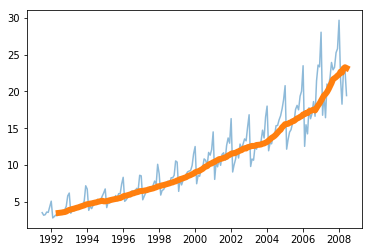

In [67]:
# Smoothing out (removing) the seasonality effect
# Leaves only the trend

plt.plot(diabetes["value"], alpha=0.5)
plt.plot(diabetes["value"].rolling(12).mean(), linewidth=6)


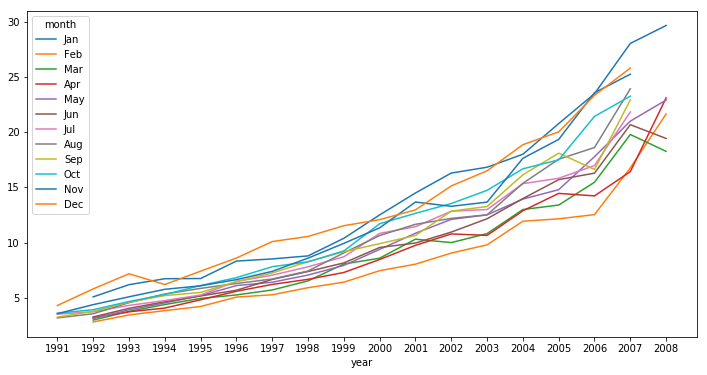

In [546]:
diabetes_piv.plot(figsize=(12,6))
_ = plt.xticks(years,years)

### Correlations (Refresher)


- Two variables $X$ and $Y$ are correlated if knowledge of one helps better predict the other

    - The correlation coefficient between two variables $X$ and $Y$ measures the degree to which $Y$ is a function of $X$ (and vice-versa).

  - The tuples of observations $(x_1,y_1), (x_2, y_2),\ldots (x_n, y_n)$ follow a linear function.
    - Here, $x \in X \text{,} y \in Y$ and $n$ is the total number of observations of the variable $X$ and $Y$.



- Examples: 
  - Antidiabetic drug sales and population size
  - Number of tourist in a Waikiki is associated with the number of souvenirs sales (reasonably strong positive relationship)



### Correlation value

- Correlation ranges from -1 (_anti-correlated_) to 1  (_fully_ _correlated_) through 0 (_uncorrelated_)

- The most popular methods for computing the correlation are:
  - Pearson Correlation coefficient ($R$)
  - Spearman Rank Correlation $(\rho)$

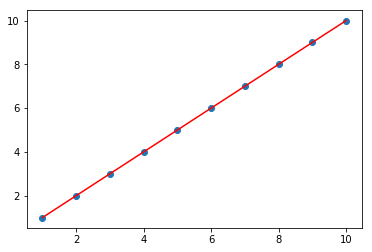

In [244]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,10]

plt.scatter(x,y)

plt.plot(X,Y, color ='r')



In [245]:
sp.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)

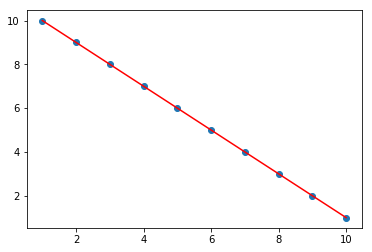

In [247]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

plt.scatter(x, y)
plt.plot(x, y, color ='r')



In [248]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.9999999999999999, pvalue=6.646897422032013e-64)

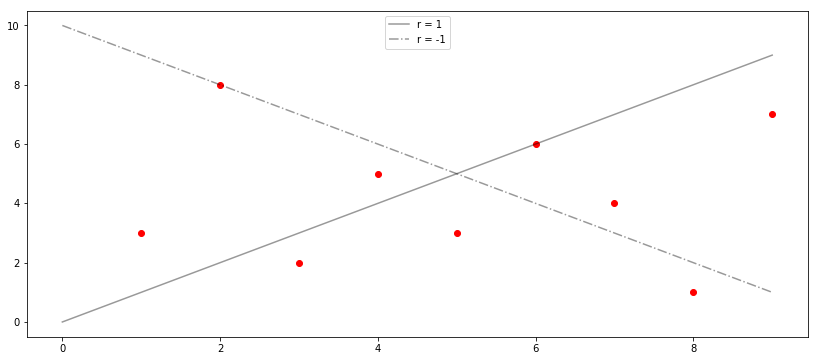

In [258]:
plt.figure(figsize=(14,6))
x = [1,2,3,4,5,6,7,8,9]
y = [3,8,2,5,3,6,4,1,7]

plt.scatter(x, y , color ='r')

plt.plot(range(10), range(10), color ='k', linestyle='-', alpha=0.4, label='r = 1')
plt.plot(range(10), range(10,0,-1), color ='k', linestyle='-.', alpha=0.4, label='r = -1')
plt.legend(loc="upper center")


In [259]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.01673654817511446, pvalue=0.9659125418111234)

### Autocorrelation Plots

* Autocorrelation measures the linear relationship between lagged values of a time series.
  * This is similar to how correlations measures the extent of a linear relationship between two variables 
  * A corrlation coefficient can be computed between $v_t$ each possibe lagged value ($v_{t-i})
    * This is referred to as $r_i$
    
* Numerical + graphical way of representing trend and seasonality


# LAGS EXAMPLE

<img src="images/lags_examples.png" alt="drawing" style="width:1100px;"/>



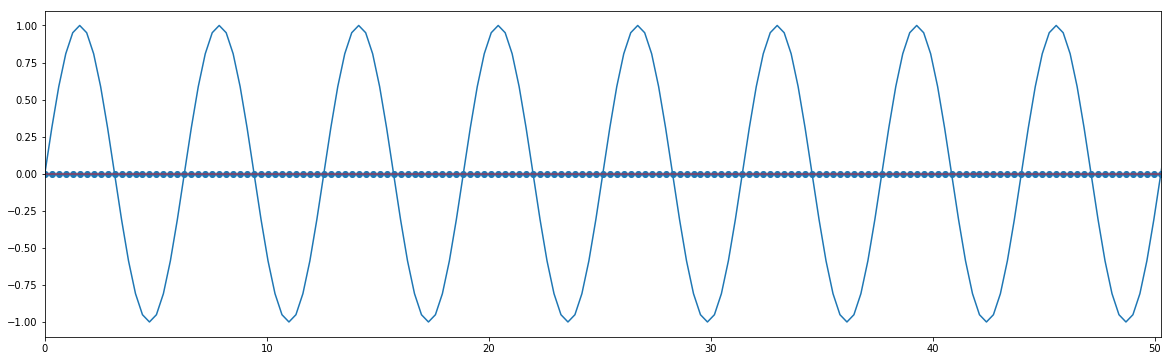

In [90]:
plt.figure(figsize=(20, 6))
x = np.arange(0, 17 * np.pi, np.pi/10)
v = np.sin(x)
plt.plot(x, v)
plt.xlim(0, 16 * np.pi)
plt.axhline(0, color='r', alpha=0.5)
plt.scatter(np.arange(0, 17 * np.pi, np.pi/10), [0] * len(x))


# Example Two: Sine Curve

<img src="images/pi_plot.png" alt="drawing" style="width:1100px;"/>



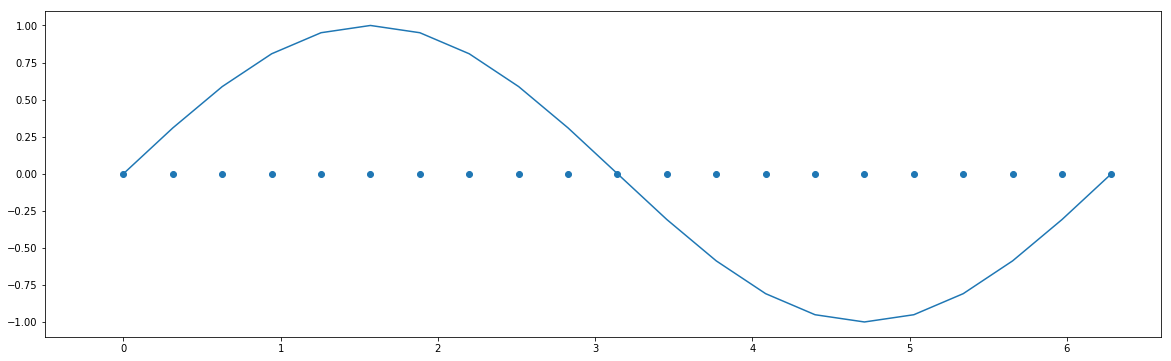

In [91]:
plt.figure(figsize=(20, 6))
x_test = np.arange(0, 2 * np.pi + (np.pi/10), np.pi/10)
v_test = np.sin(x_test)
plt.plot(x_test, v_test)
plt.xlim(-0.5, 2.1 * np.pi)
plt.scatter(x_test, [0] * len(x_test))


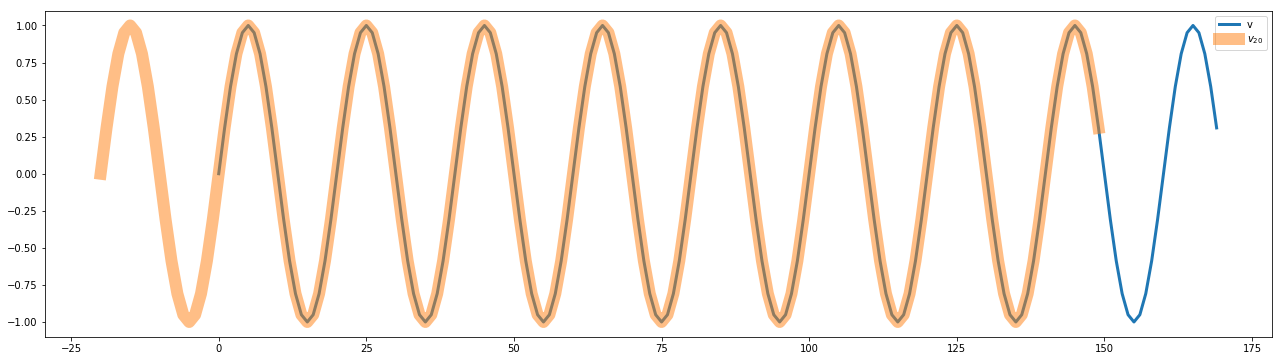

In [121]:
plt.figure(figsize=(22, 6))

plt.plot(v, linewidth=3, label="v")
plt.plot(np.arange(-20, len(v)-20), v, alpha=0.5, linewidth=12, label="$v_{20}$")
plt.legend()

### Example: Aligned $v_t$ and {v_t-20}

<img src="images/2pi_aligned.png" alt="drawing" style="width:1100px;"/>


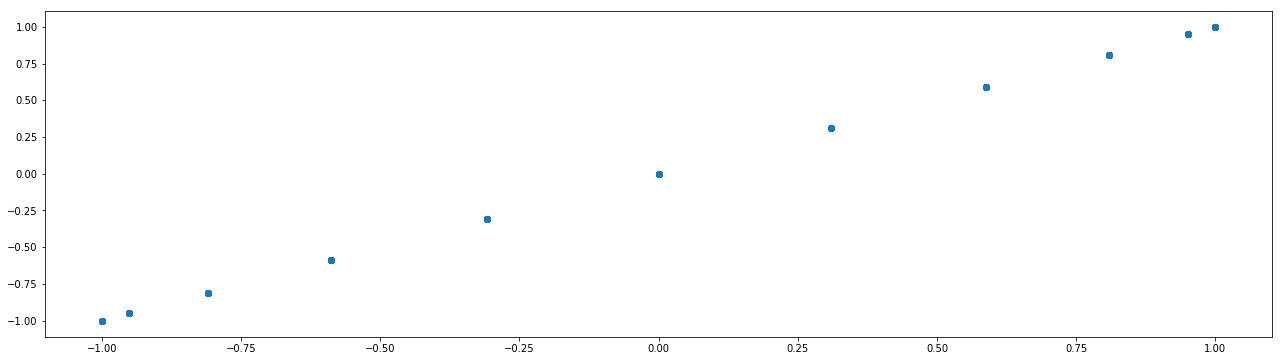

In [366]:
plt.figure(figsize=(22, 6))

plt.scatter(v[:-20], v[20:])

### Autocorrelation $v_{t}$ and $v_{t-20}$

* Measuring the relationship between $v_t$ and $v_{t-20}$

  * The values of X and Y are identical
  * Therefore the correlation should be positive and at its maximum (+1)





### Autocorrelation $r_{10}$

* What does the correlation at between v_t and v_{t-10} look like? 

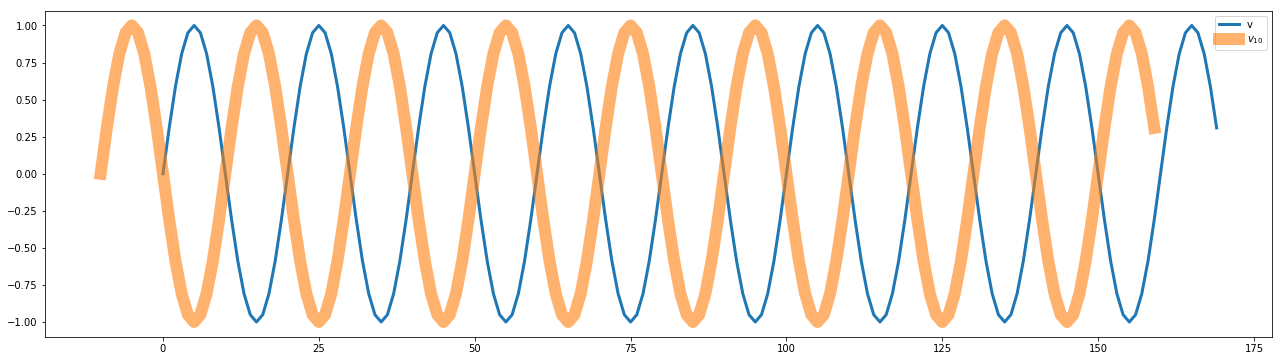

In [122]:
plt.figure(figsize=(22, 6))

plt.plot(v, linewidth=3, label="v")
plt.plot(np.arange(-10, len(v)-10), v, alpha=0.6, linewidth=12, label="$v_{10}$")
plt.legend()

### Autocorrelation $v_{t}$ and $v_{t-10}$

<img src="images/pi_aligned.png" alt="drawing" style="width:800px;"/>

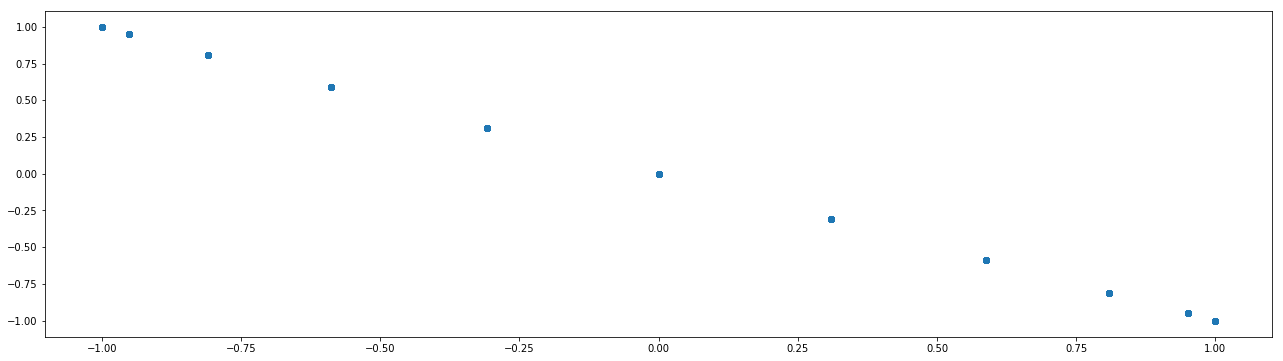

In [124]:
plt.figure(figsize=(22, 6))

plt.scatter(v[:-10], v[10:])

In [374]:
v_lag_10 = v[10:]
stats.pearsonr(v[:-10], v_lag_10)

(array([-1.]), 0.0)

### Autocorrelation $r_{5}$

* What does the correlation at between v_t and v_{t-5} look like? 

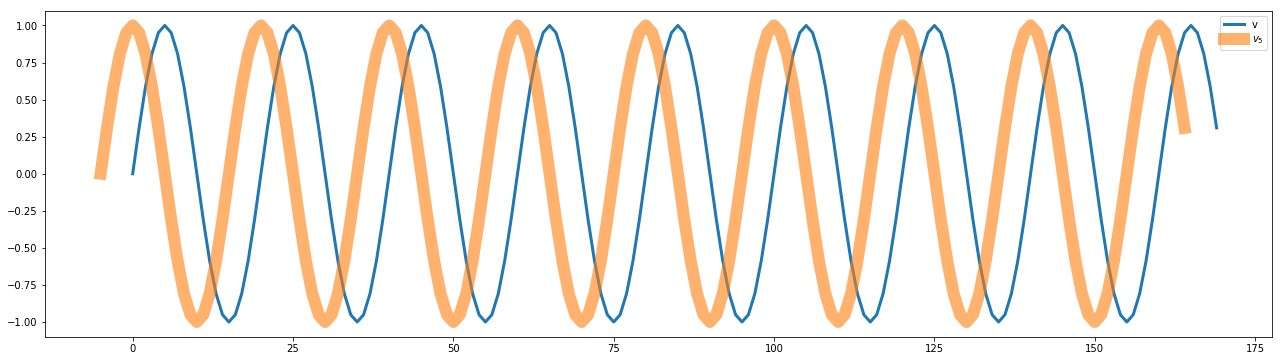

In [127]:
plt.figure(figsize=(22, 6))

plt.plot(v, linewidth=3, label="v")
plt.plot(np.arange(-5, len(v)-5), v, alpha=0.6, linewidth=12, label="$v_{5}$")
plt.legend()

### Autocorrelation $v_{t}$ and $v_{t-5}$

<img src="images/pi_2_aligned.png" alt="drawing" style="width:800px;"/>

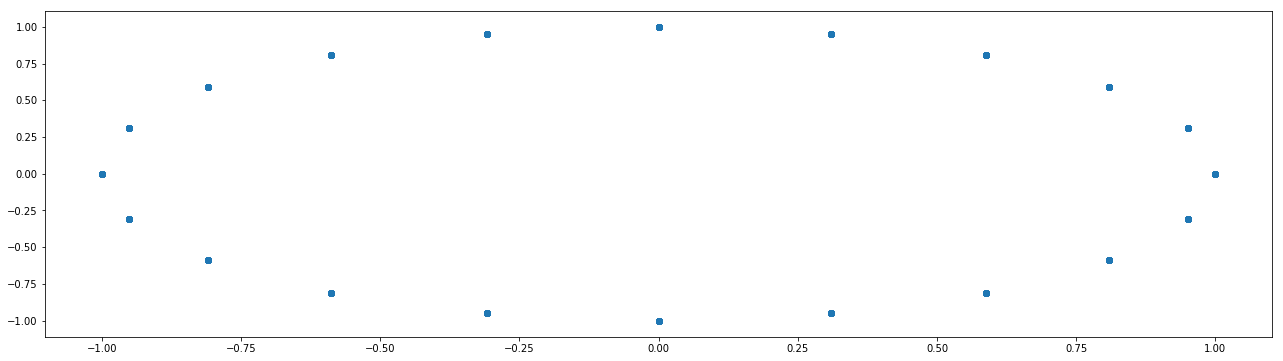

In [129]:
plt.figure(figsize=(22, 6))

plt.scatter(v[:-5], v[5:])

In [130]:
v_lag_5 = v[5:]
stats.pearsonr(v[:-5], v_lag_5)

(0.017952659953799507, 0.8189688680617753)

### Autocorrelation Function (ACF) Plots 

* Shows the entire correlation function for different lags

* Naturally, the ACF at lag 0 is equal to 1
  * information at a lag of 0 is uninteresting

* Useful to exploring both the trend and the seasonality

* Shows the autocorrelation up a userdefined number of lags


* Naturally, we don't expect to see autocorrelation in noise
  * Past events are not correlated to current events
 


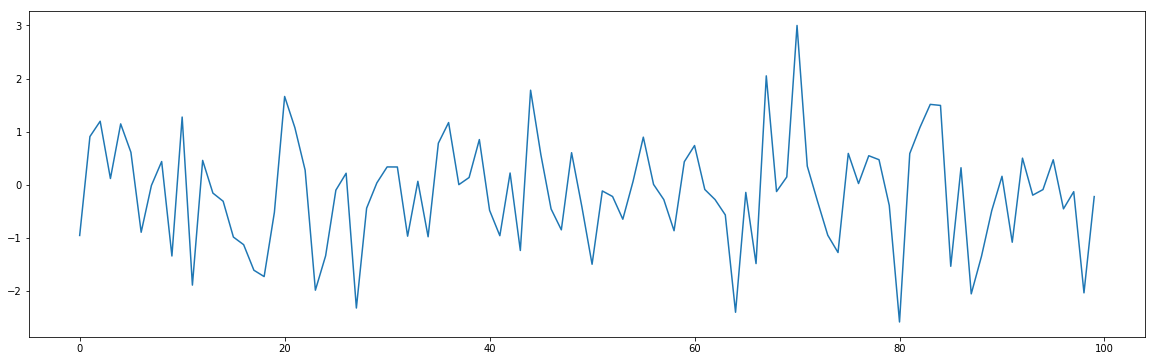

In [158]:
# in the pr
v_noise = np.random.normal(0, 1, 100)

plt.figure(figsize=(20,6))

plt.plot(range(len(v_noise)), v_noise)

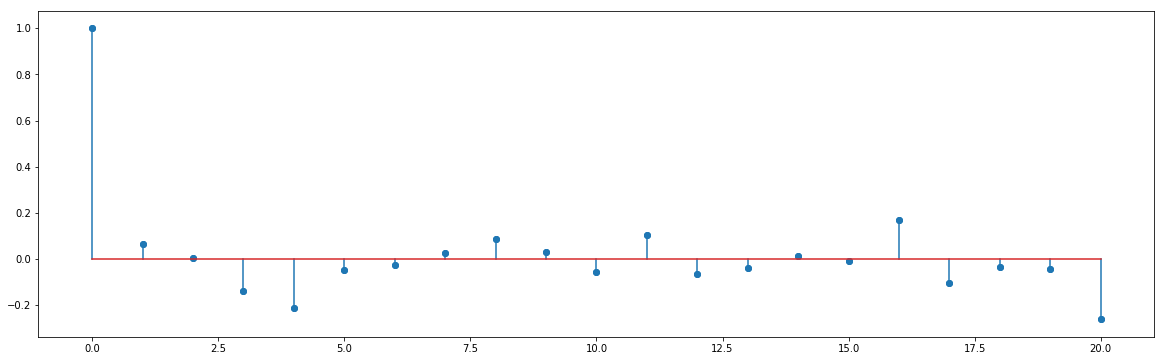

In [159]:
plt.figure(figsize=(20,6))

acv_v_noise = acf(v_noise,  nlags=20)
plt.stem(np.arange(len(acv_v_noise)), acv_v_noise)
plt.scatter(np.arange(len(acv_v_noise)), acv_v_noise)


### Autocorrelation Function (ACF) Plots -- Trend

* Time series with trend  should contain clearly defined autocorrelation beyong lag 0
 * Extent at each lag is proportional to correlation. 
 * Example, in a time series with a trend, the autocorrelation at a lag of 1 should high, particularly when the trend is not linear

In [162]:
co2 = pd.read_csv("data/carbon_dioxide.txt", header=None)
co2.columns = ["values"]
co2.head()

,values
0,315.42
1,316.32
2,316.49
3,317.56
4,318.13


<Container object of 3 artists>

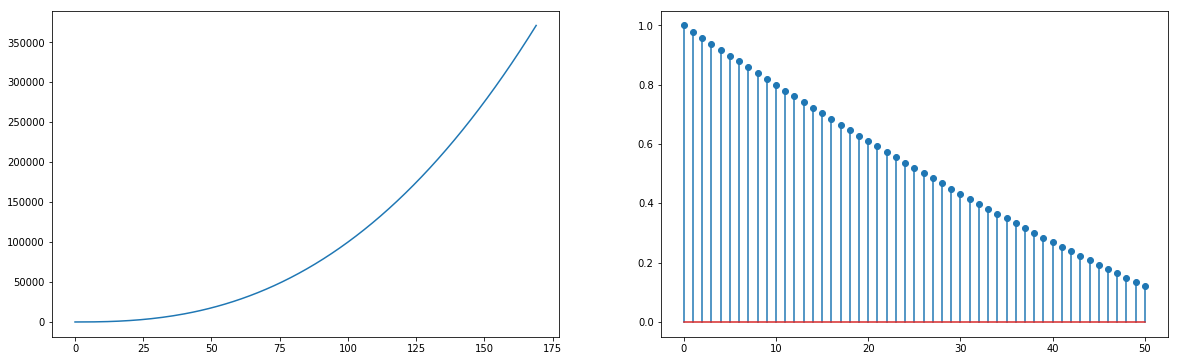

In [169]:
# trend in the CO2 dataset and the ACF plot for the same dataset
plt.figure(figsize=(20,6))
t = np.arange(0,170)
v_r_t = 1 +  t ** 2.5 
plt.subplot(1,2,1)
plt.plot(t, v_r_t)
plt.subplot(1,2,2)
acf_v_r_t = acf(v_r_t,  nlags=50)
plt.stem(range(len(acf_v_r_t)), acf_v_r_t)


(-1000, 20000)

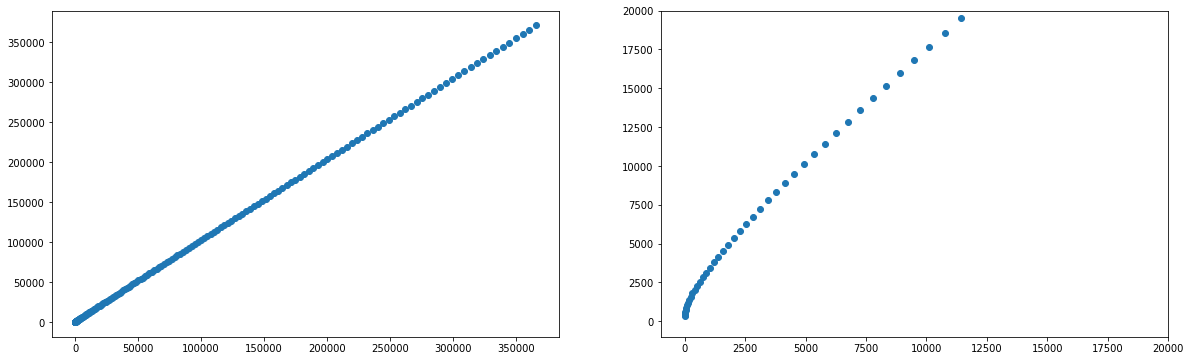

In [141]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
_ = plt.scatter(v_r_t[:-1], v_r_t[1:])
plt.subplot(1,2,2)
_ = plt.scatter(v_r_t[:-10], v_r_t[10:])
plt.xlim(-1000, 20000)

plt.ylim(-1000, 20000)


(-1000, 200000)

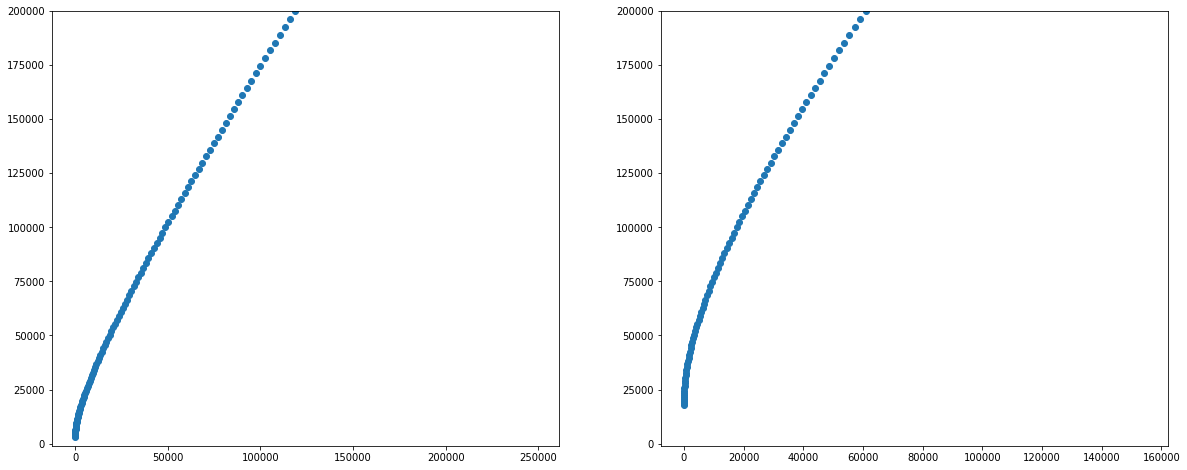

In [153]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,1)
_ = plt.scatter(v_r_t[:-25], v_r_t[25:])
plt.ylim(-1000, 200000)

plt.subplot(1,2,2)
_ = plt.scatter(v_r_t[:-50], v_r_t[50:])
plt.ylim(-1000, 200000)

### Autocorrelation Function (ACF) Plots -- Seasonality


* Time series with seasonality should contain clearly defined autocorrelation beyong lag 0
 * Extent at each lag $i$ is proportional to between $t$ ad $t-i$
 
 * Example, in a time series with a seasonality with a perior of $2\pi$, the autocorrelation at a lags:
   * $\pi$ should high and negative
   * $2\pi$ should high and positve
   

<Container object of 3 artists>

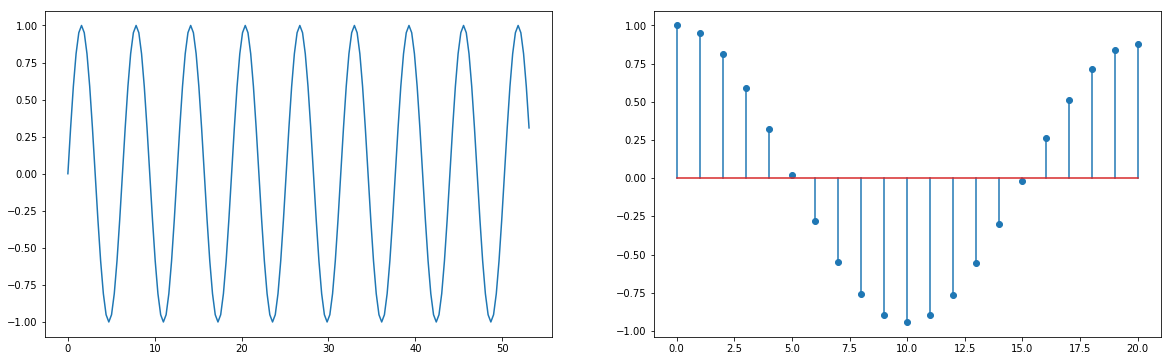

In [171]:
plt.figure(figsize=(20,6))

t = np.arange(0, 17 * np.pi, np.pi/10)
v_s_t = np.sin(t)

plt.subplot(1,2,1)
plt.plot(t, v_s_t)

plt.subplot(1,2,2)
acf_v_s_t = acf(v_s_t, nlags=20)
plt.stem(range(len(acf_v_s_t)), acf_v_s_t)

([], <a list of 0 Text yticklabel objects>)

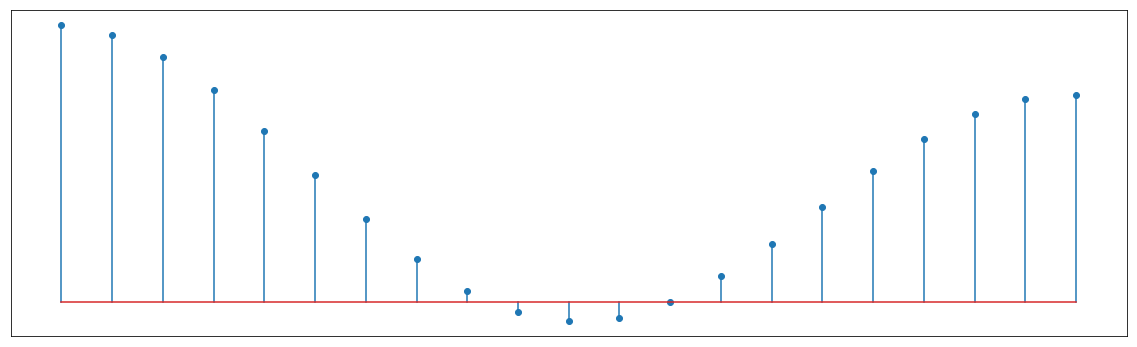

In [181]:
acf_v_t = acf(v_r_t, nlags=20) +  acf(v_s_t, nlags=20)


plt.figure(figsize=(20,6))

# plt.subplot(1,2,1)
plt.stem(np.arange(21), acf_v_t)
plt.xticks([],[])

plt.yticks([],[])


### ACF 

* In summary: 
    
  *  In the presence of a trend, the autocorrelations for small lags tends to be large and positive 
    * ACF values decrease as lag increase

  * With seasonal data, ACF values are larger for priod or half periods

* For data with both trend a seasonality, you see a combination of both
  
    * Additive effect makes it harder to see trend clerly
    * May be useful to remove detrend before computing the ACF for Seasonality.
